In [1]:
import matplotlib.pyplot as plt
import cv2

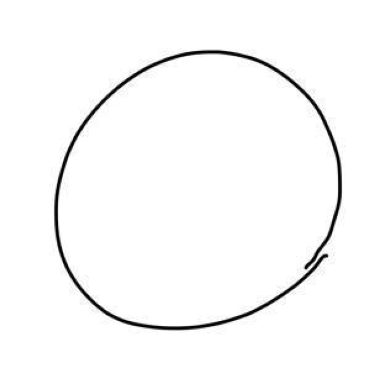

In [2]:
image = cv2.imread("./datasets/train/o_25.jpg", cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap="gray"), plt.axis("off") # 이미지를 출력
plt.show()

In [3]:
for i in range(300):
    print(image[i])

[255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 25

In [4]:
image.shape

(300, 300)

In [5]:
import os

In [6]:
import torch.nn as nn
import torch
from torch import optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np

In [7]:
def load_images_from_folder(folder):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        if os.path.isfile(img_path):
            # 이미지 파일 읽기
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                # 이미지 크기 조정 (300x300)
                img = cv2.resize(img, (300, 300))
                images.append(img)
                
                # 파일 이름에 따라 라벨 설정
                if 'O' in filename or 'o' in filename:
                    labels.append(0)
                elif 'X' in filename or 'x' in filename:
                    labels.append(1)
                else:
                    print(f"Warning: {filename} does not contain 'O' or 'X'")
    # 넘파이 배열로 변환 후 텐서로 변환
    images = np.array(images)
    labels = np.array(labels)
    
    # 이미지 배열 차원 조정 (N, 1, 300, 300)
    images = images[:, np.newaxis, :, :]
    
    return torch.tensor(images, dtype=torch.float32), torch.tensor(labels, dtype=torch.long)

In [8]:
# 데이터셋 폴더 경로 설정 (예: train_data 폴더)
train_folder = './datasets/train'
test_folder = './datasets/test'

# 전처리 함수 호출
X_train, y_train = load_images_from_folder(train_folder)
X_test, y_test = load_images_from_folder(test_folder)

In [9]:
X_train.shape

torch.Size([240, 1, 300, 300])

In [10]:
y_train.shape

torch.Size([240])

In [11]:
print(X_train.shape,
      y_train.shape)

torch.Size([240, 1, 300, 300]) torch.Size([240])


In [12]:
y_test.shape

torch.Size([40])

In [13]:
# TensorDataset 및 DataLoader 생성
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [14]:
next(iter(train_loader))

[tensor([[[[255., 255., 255.,  ..., 255., 255., 255.],
           [255., 255., 255.,  ..., 255., 255., 255.],
           [255., 255., 255.,  ..., 255., 255., 255.],
           ...,
           [255., 255., 255.,  ..., 255., 255., 255.],
           [255., 255., 255.,  ..., 255., 255., 255.],
           [255., 255., 255.,  ..., 255., 255., 255.]]],
 
 
         [[[255., 255., 255.,  ..., 255., 255., 255.],
           [255., 255., 255.,  ..., 255., 255., 255.],
           [255., 255., 255.,  ..., 255., 255., 255.],
           ...,
           [255., 255., 255.,  ..., 255., 255., 255.],
           [255., 255., 255.,  ..., 255., 255., 255.],
           [255., 255., 255.,  ..., 255., 255., 255.]]],
 
 
         [[[255., 255., 255.,  ..., 255., 255., 255.],
           [255., 255., 255.,  ..., 255., 255., 255.],
           [255., 255., 255.,  ..., 255., 255., 255.],
           ...,
           [255., 255., 255.,  ..., 255., 255., 255.],
           [255., 255., 255.,  ..., 255., 255., 255.],
     

In [15]:
# MLP 모델 정의
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.flatten = nn.Flatten(start_dim=1)  # start_dim=1으로 설정
        self.fc1 = nn.Linear(300 * 300, 128)  # 입력 크기를 맞추기 위해 300*300으로 설정
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 2)  # 이진 분류를 위한 출력 노드 2개

    def forward(self, x):
        x = self.flatten(x)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = MLP()

In [16]:
# 손실 함수 및 옵티마이저 정의
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [17]:
# 훈련 함수 정의
def train(epoch):
    model.train()
    running_loss = 0.0
    for data, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(data)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader)}')

In [18]:
# 테스트 함수 정의
def test():
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data, targets in test_loader:
            outputs = model(data)
            _, predicted = torch.max(outputs.data, 1)
            total += targets.size(0)
            correct += (predicted == targets).sum().item()
    print(f'Accuracy: {100 * correct / total}%')

In [19]:
# 훈련 및 테스트 실행
num_epochs = 20
for epoch in range(num_epochs):
    train(epoch)
test()

Epoch [1/20], Loss: 2126.3726486563683
Epoch [2/20], Loss: 456.28899669647217
Epoch [3/20], Loss: 170.37494468688965
Epoch [4/20], Loss: 165.25687780976295
Epoch [5/20], Loss: 259.86230540275574
Epoch [6/20], Loss: 458.5780420303345
Epoch [7/20], Loss: 249.37872895598412
Epoch [8/20], Loss: 289.5101239681244
Epoch [9/20], Loss: 206.58130288124084
Epoch [10/20], Loss: 199.8275785446167
Epoch [11/20], Loss: 266.9458932876587
Epoch [12/20], Loss: 240.57830321788788
Epoch [13/20], Loss: 64.21020245552063
Epoch [14/20], Loss: 235.20817184448242
Epoch [15/20], Loss: 47.768760710954666
Epoch [16/20], Loss: 33.53140437602997
Epoch [17/20], Loss: 119.9505443572998
Epoch [18/20], Loss: 91.82281291484833
Epoch [19/20], Loss: 24.860219419002533
Epoch [20/20], Loss: 26.764366433024406
Accuracy: 60.0%


In [20]:
# 모델 예측
with torch.no_grad():
    prediction = model(X_test.float())  # X_test를 float으로 변환하여 모델에 입력
    correct_prediction = torch.argmax(prediction, 1) == y_test
    accuracy = correct_prediction.float().mean()
    print(f'Prediction Accuracy: {accuracy.item() * 100}%')

Prediction Accuracy: 60.00000238418579%


In [21]:
def predict(model, data_loader):
    with torch.no_grad():
        model.eval()
        ret = None
        for img, files in data_loader:
            img = img
            pred = model(img)
            
            if ret is None:
                ret = pred.numpy()
            else:
                ret = np.vstack([ret, pred.numpy()])
    return ret
   
pred = predict(model, test_loader)

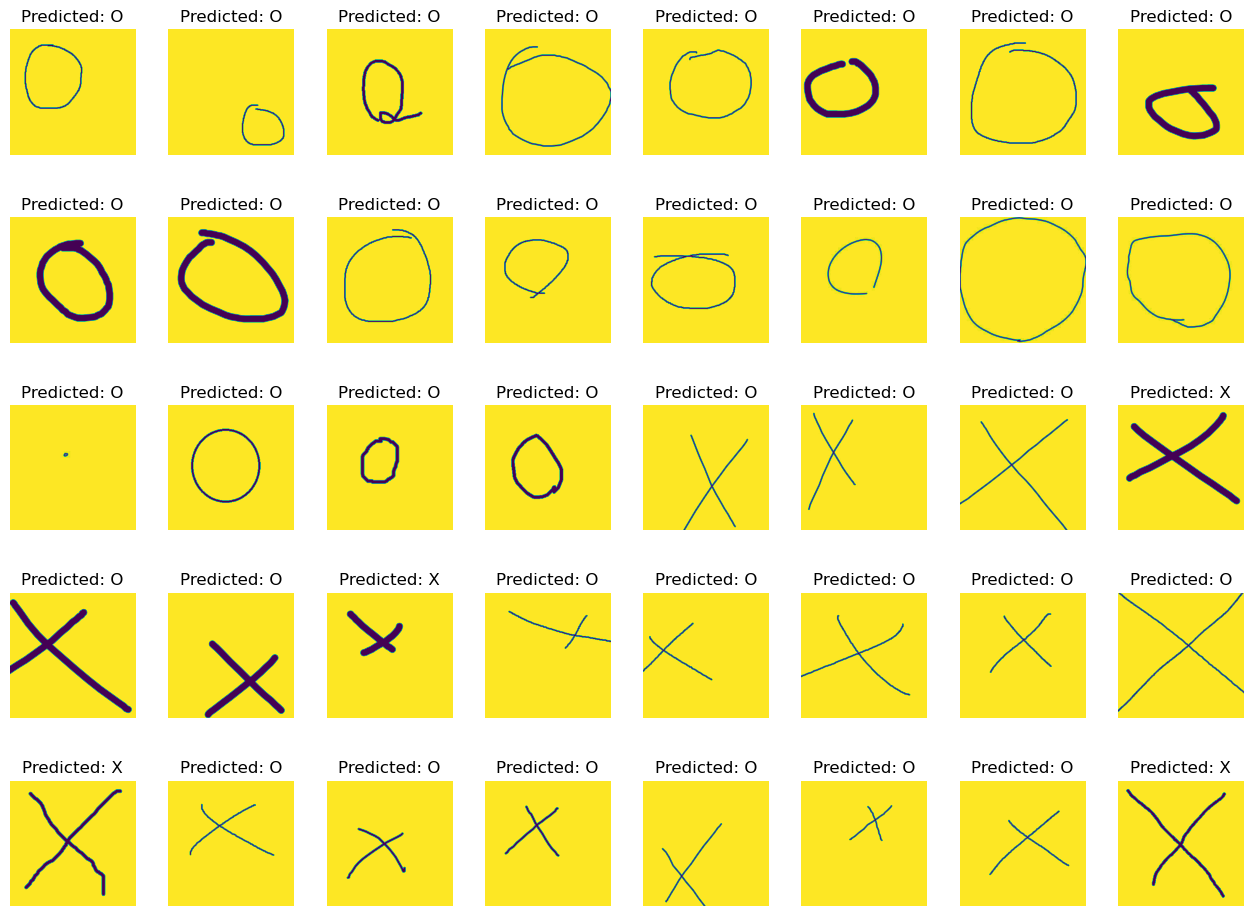

In [22]:
def visualize_predictions(model, test_loader, classes):
    model.eval()  # 모델을 평가 모드로 설정
    fig = plt.figure(figsize=(16, 24))

    with torch.no_grad():
        for batch_idx, (images, labels) in enumerate(test_loader):
            outputs = model(images)  # 모델을 통해 예측
            _, predicted = torch.max(outputs, 1)  # 확률이 가장 높은 클래스 선택

            for i in range(len(images)):
                ax = fig.add_subplot(8, 8, batch_idx * test_loader.batch_size + i + 1)
                ax.set_title(f'Predicted: {classes[predicted[i].item()]}')
                ax.axis('off')
                ax.imshow(np.transpose(images[i].numpy(), (1, 2, 0)))  # 이미지를 시각화
                if batch_idx * test_loader.batch_size + i + 1 >= 64:
                    break

    plt.subplots_adjust(bottom=0.2, top=0.8, hspace=0.5)
    plt.show()

# 예측 클래스 매핑
classes = {0: 'O', 1: 'X'}

# visualize_predictions 함수를 호출하여 시각화
visualize_predictions(model, test_loader, classes)

In [23]:
from sklearn.model_selection import KFold

In [24]:
kfold = KFold(n_splits=5)

In [25]:
# 훈련 함수 정의
def train(epoch):
    model.train()
    running_loss = 0.0
    for data, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(data)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader)}')

In [26]:
# 테스트 함수 정의
def test():
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data, targets in test_loader:
            outputs = model(data)
            _, predicted = torch.max(outputs.data, 1)
            total += targets.size(0)
            correct += (predicted == targets).sum().item()
    print(f'Accuracy: {100 * correct / total}%')

C:\Users\tkdql\AppData\Local\Temp\ipykernel_15152\2317492781.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_dataset = TensorDataset(torch.tensor(X_train_fold), torch.tensor(y_train_fold))
C:\Users\tkdql\AppData\Local\Temp\ipykernel_15152\2317492781.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_dataset = TensorDataset(torch.tensor(X_test_fold), torch.tensor(y_test_fold))


Epoch [1/10], Loss: 17.551474889119465
Epoch [2/10], Loss: 24.969650665918987
Epoch [3/10], Loss: 59.06403303146362
Epoch [4/10], Loss: 26.497287809848785
Epoch [5/10], Loss: 6.1448807915051775
Epoch [6/10], Loss: 15.665684620539347
Epoch [7/10], Loss: 26.463124970595043
Epoch [8/10], Loss: 9.379818479220072
Epoch [9/10], Loss: 5.561296100417773
Epoch [10/10], Loss: 7.861326227585475


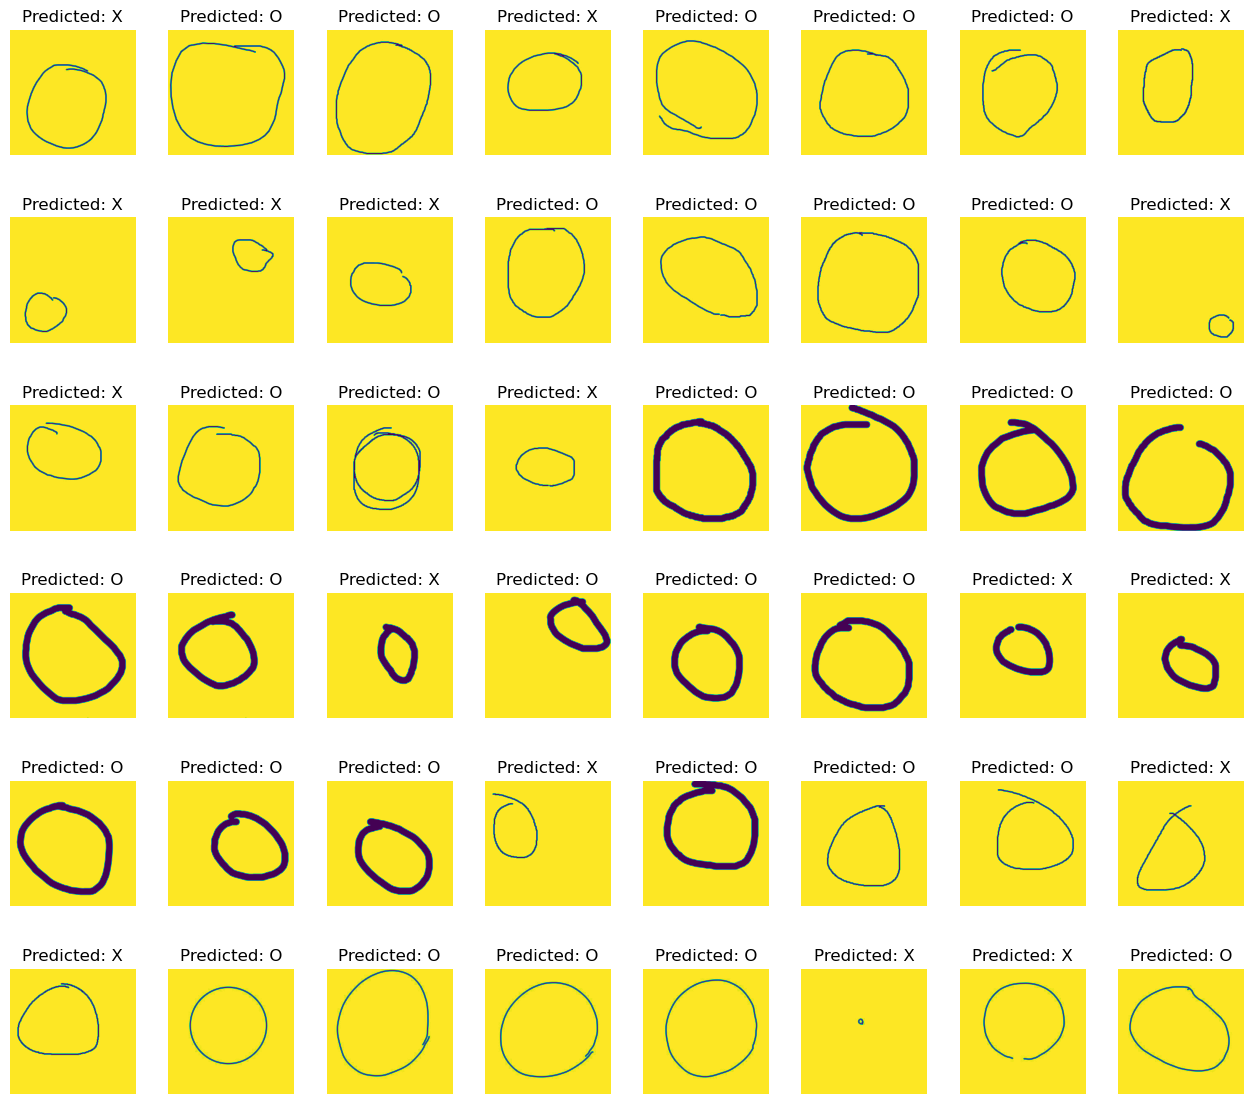

Epoch [1/10], Loss: 10.308470030625662
Epoch [2/10], Loss: 6.386411766366412
Epoch [3/10], Loss: 1.367838066071272
Epoch [4/10], Loss: 2.9194146593411765
Epoch [5/10], Loss: 10.562779247760773
Epoch [6/10], Loss: 10.373355249563852
Epoch [7/10], Loss: 18.511080880959828
Epoch [8/10], Loss: 10.898114264011383
Epoch [9/10], Loss: 4.672769486904144
Epoch [10/10], Loss: 3.300600759741125


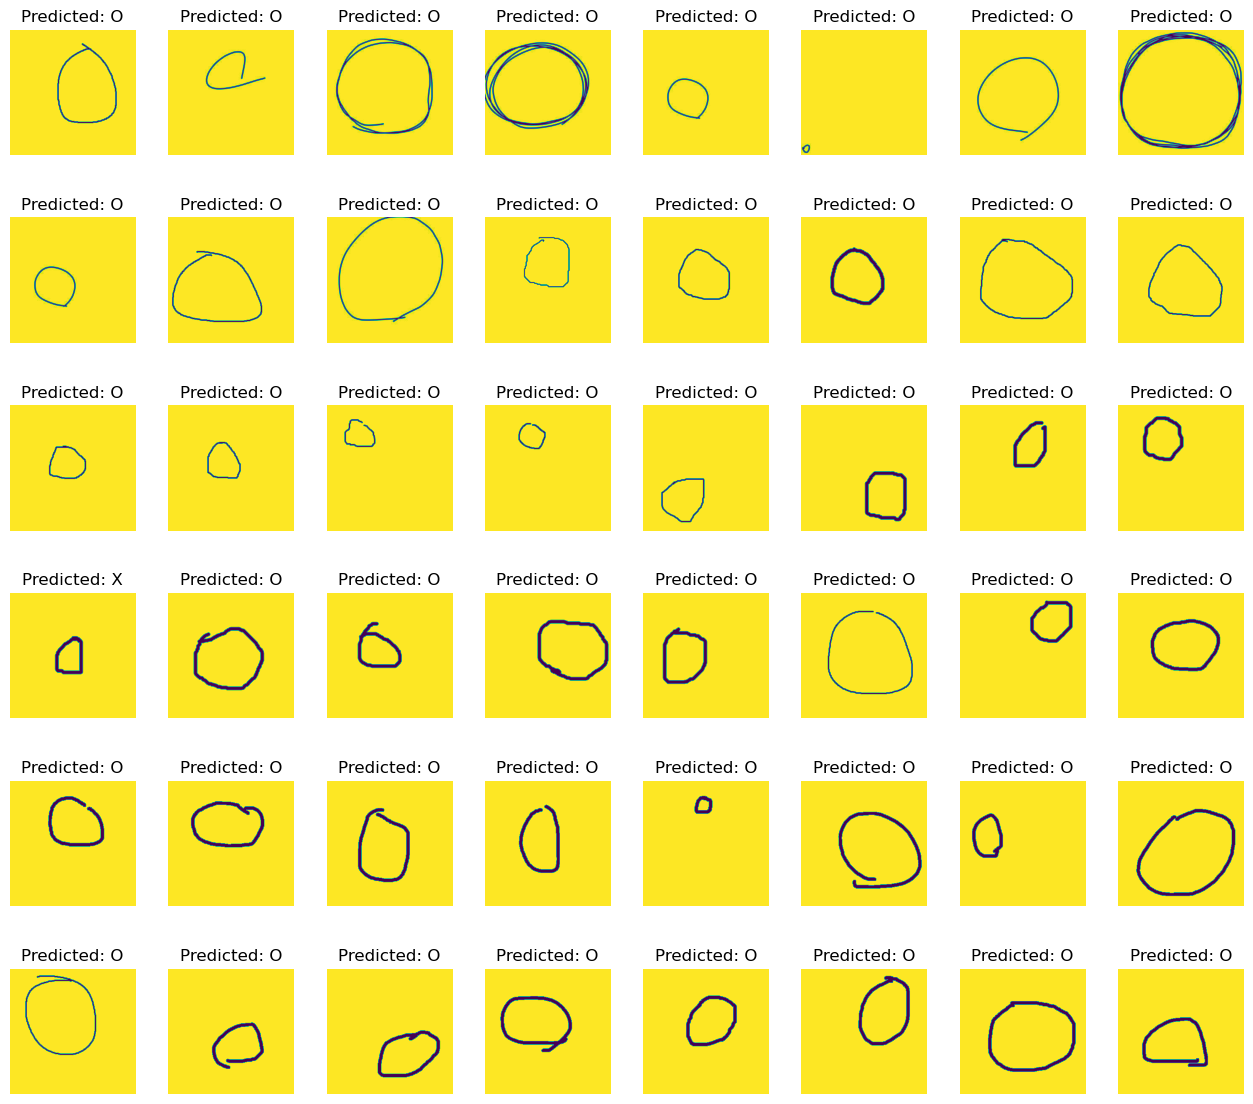

Epoch [1/10], Loss: 6.697656710942586
Epoch [2/10], Loss: 3.9758342107137046
Epoch [3/10], Loss: 1.2667488360699888
Epoch [4/10], Loss: 8.812751789887747
Epoch [5/10], Loss: 9.167938748995462
Epoch [6/10], Loss: 7.143441418806712
Epoch [7/10], Loss: 7.562656939029694
Epoch [8/10], Loss: 5.615148941675822
Epoch [9/10], Loss: 4.662031352519989
Epoch [10/10], Loss: 2.6717412769794464


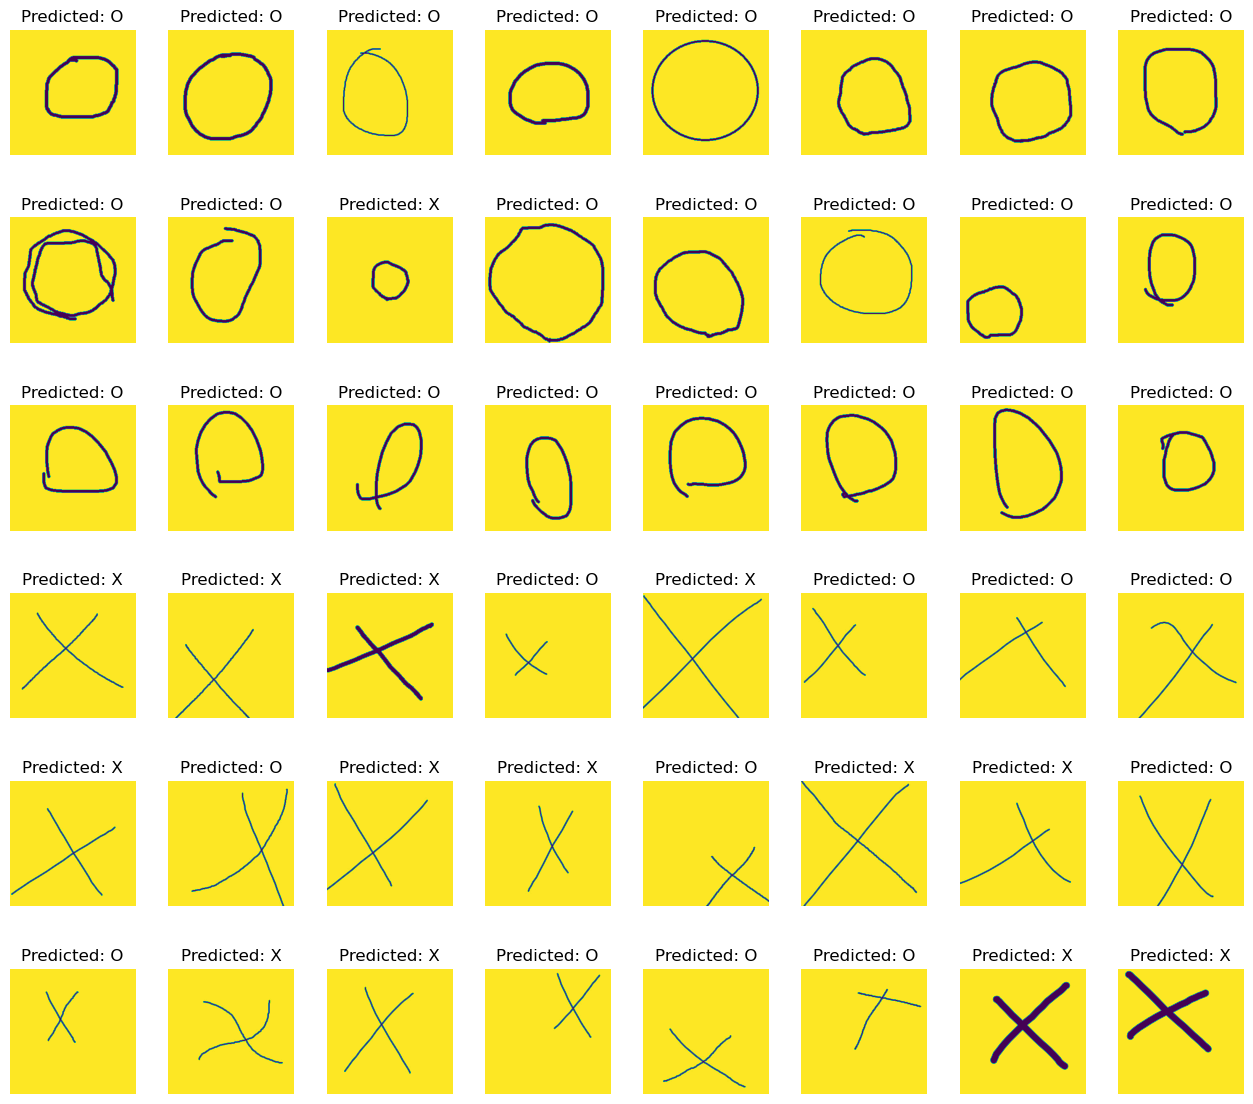

Epoch [1/10], Loss: 2.058217224975427
Epoch [2/10], Loss: 2.3292036950588226
Epoch [3/10], Loss: 1.0980633447567623
Epoch [4/10], Loss: 0.8114285965760549
Epoch [5/10], Loss: 1.4646871288617451
Epoch [6/10], Loss: 3.1405029545227685
Epoch [7/10], Loss: 9.03842000166575
Epoch [8/10], Loss: 4.574133259554704
Epoch [9/10], Loss: 7.3749823073546095
Epoch [10/10], Loss: 3.1194416284561157


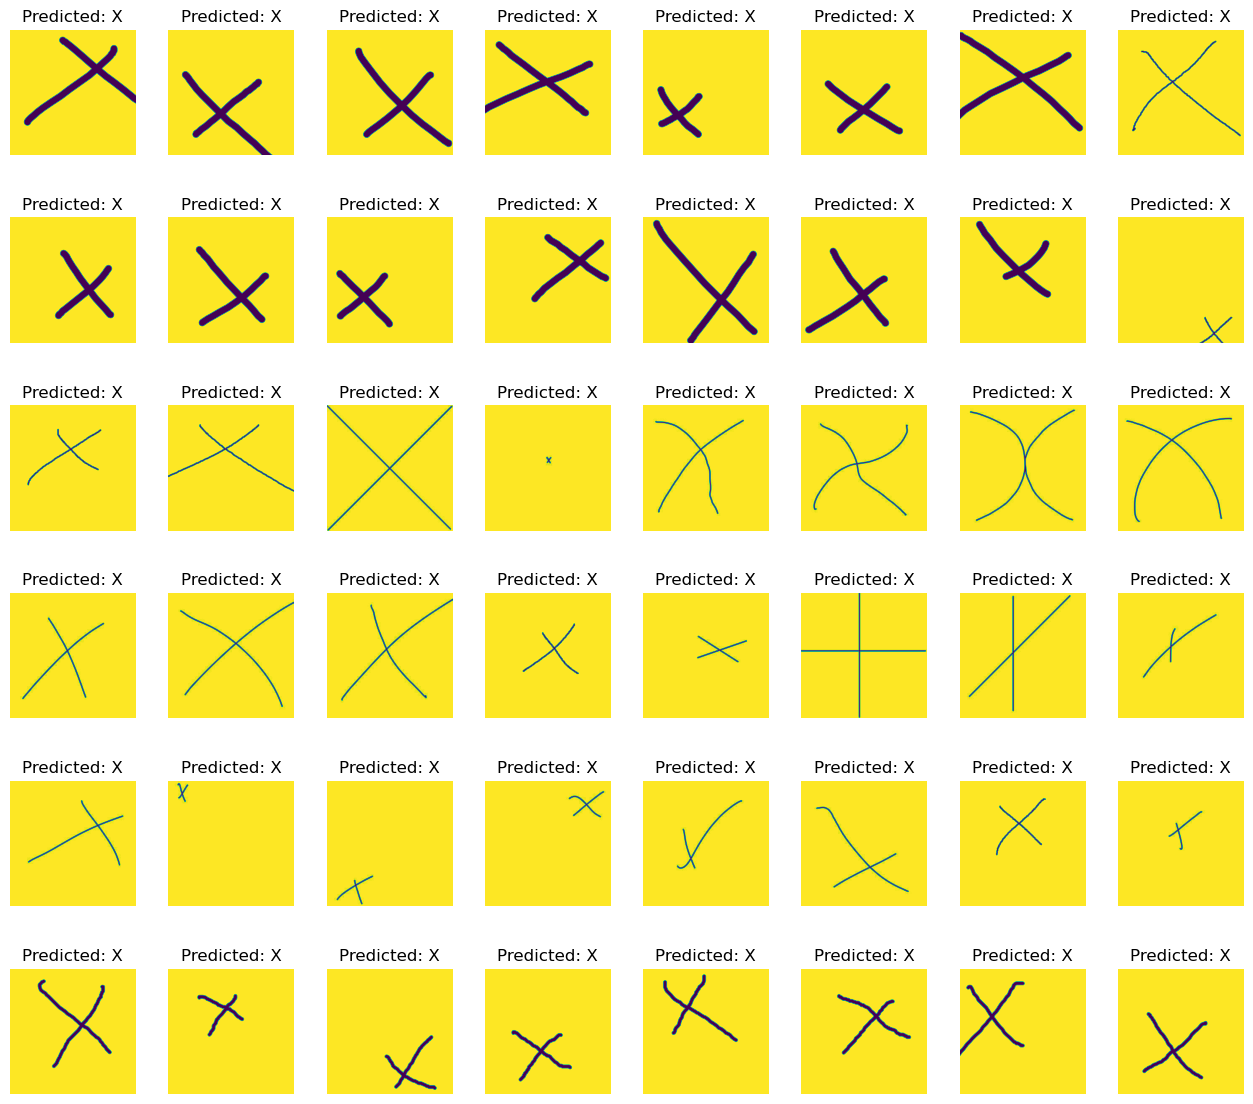

Epoch [1/10], Loss: 7.694247821966807
Epoch [2/10], Loss: 14.983410080273947
Epoch [3/10], Loss: 12.59338369872421
Epoch [4/10], Loss: 10.52116230626901
Epoch [5/10], Loss: 6.0923508405685425
Epoch [6/10], Loss: 6.837624713778496
Epoch [7/10], Loss: 2.1157911668221154
Epoch [8/10], Loss: 6.026189217964808
Epoch [9/10], Loss: 19.103071222702663
Epoch [10/10], Loss: 17.460849424203236


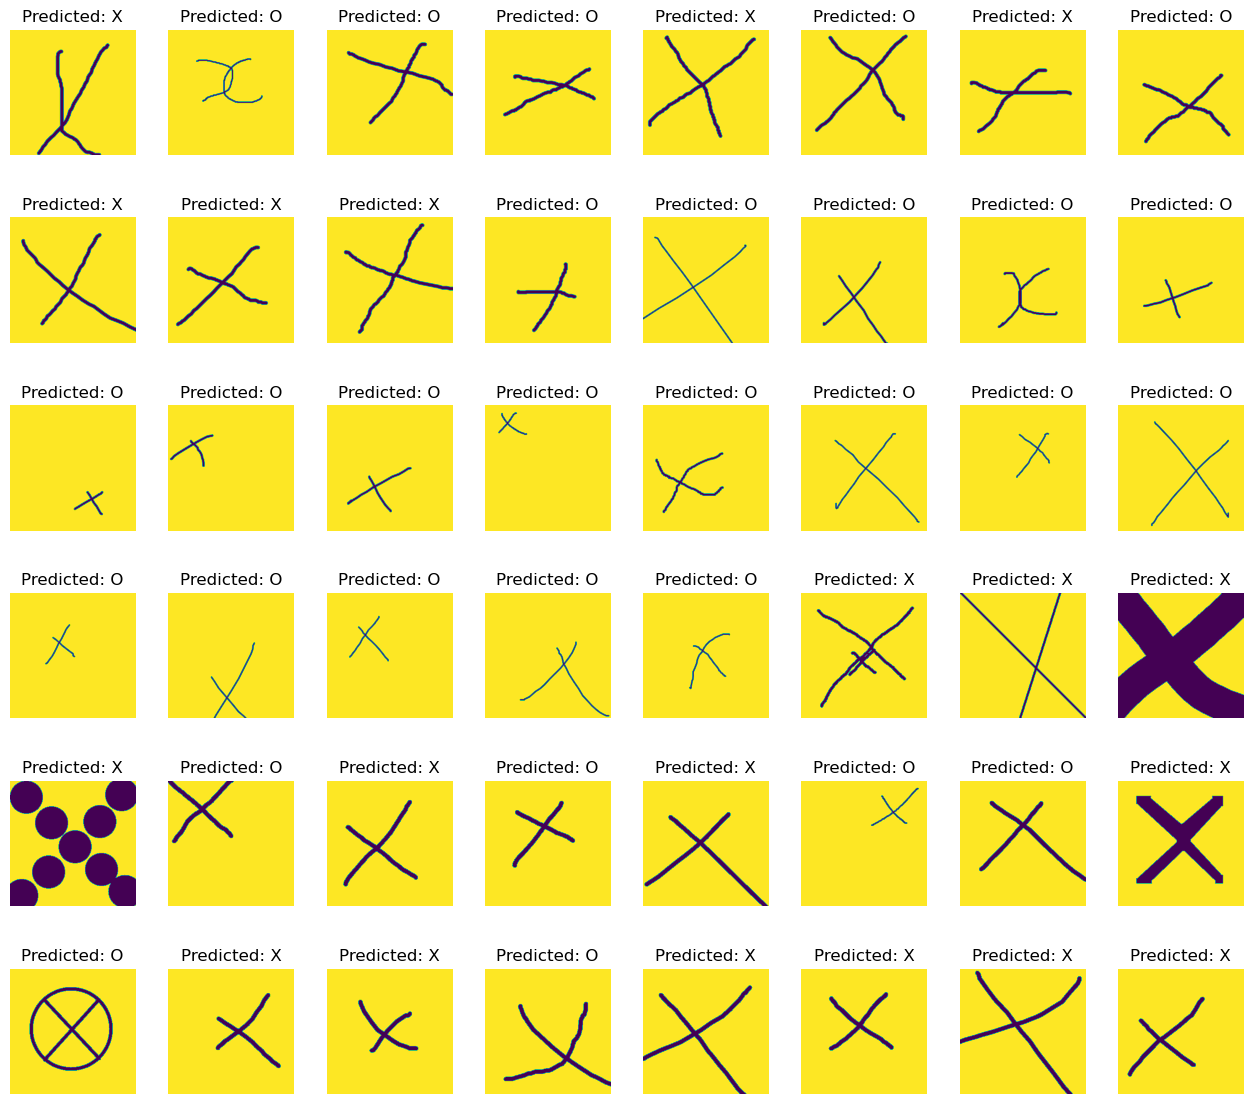

In [27]:
# 훈련 및 테스트 실행
num_epochs = 10

for train_index, test_index in kfold.split(X_train, y_train):
    # kfold.split()으로 반환된 인덱스를 활용하여 train용, test용 데이터 추출
    X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
    y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]
    
    # TensorDataset 및 DataLoader 생성
    train_dataset = TensorDataset(torch.tensor(X_train_fold), torch.tensor(y_train_fold))
    test_dataset = TensorDataset(torch.tensor(X_test_fold), torch.tensor(y_test_fold))
    
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
    
    for epoch in range(num_epochs):
        train(epoch)
    visualize_predictions(model, test_loader, classes)

In [28]:
print(X_train_fold.shape)
print(y_train_fold.shape)
print(X_test_fold.shape)
print(y_test_fold.shape)

torch.Size([192, 1, 300, 300])
torch.Size([192])
torch.Size([48, 1, 300, 300])
torch.Size([48])
